# PVInspect Containers Example

This example demonstrates the basic use of `PVInspect` containers. First, the toolbox needs to be installed and imported:

In [1]:
import pvinspect as pv

Next, `N=10` images are loaded from the builtin ELPV dataset [1, 2, 3]:

In [2]:
seq = pv.datasets.elpv(N=10)
seq

We readily see that a `LazyImageSequence` is returnd, which is a subclass of `ImageSequence`, featuring the tight coupling of meta and image data as well as providing access to individual images.

## Meta data

Meta data can be accessed using the `.meta`-attribute:

In [3]:
seq.meta

,original_filename,modality,defect_probability,wafer,crack,inactive,blob,finger,testset
0,cell1922.png,EL_IMAGE,0.000000,poly,False,False,False,False,True
1,cell0382.png,EL_IMAGE,1.000000,mono,True,False,False,True,False
2,cell2595.png,EL_IMAGE,0.000000,poly,False,False,False,False,True
3,cell2581.png,EL_IMAGE,0.333333,poly,False,False,False,False,False
4,cell0396.png,EL_IMAGE,1.000000,mono,True,True,False,True,False
5,cell1088.png,EL_IMAGE,1.000000,mono,True,False,False,False,False
6,cell1936.png,EL_IMAGE,0.000000,poly,False,False,False,False,False
7,cell1705.png,EL_IMAGE,0.000000,poly,False,False,False,False,False
8,cell1063.png,EL_IMAGE,0.000000,mono,False,False,False,False,False
9,cell1077.png,EL_IMAGE,0.000000,mono,False,False,False,False,False


In [4]:
type(seq.meta)

pandas.core.frame.DataFrame

It is returned as a Pandas `DataFrame`, providing a well-known interface for further manipulation and investigation. But there's even more: Using the `.pandas` namespace available with the `ImageSequence`, we can directly use methods available from Pandas and apply them on the `ImageSequence`. For example, we can use the `.query`-method to filter images by their meta data:

In [5]:
crack_seq = seq.pandas.query("crack == True")
crack_seq

Again, this returns an `ImageSequence`. We can verify that this is a subset of the original sequence meeting the specified criteria:

In [6]:
crack_seq.meta

,original_filename,modality,defect_probability,wafer,crack,inactive,blob,finger,testset
0,cell0382.png,EL_IMAGE,1.0,mono,True,False,False,True,False
1,cell0396.png,EL_IMAGE,1.0,mono,True,True,False,True,False
2,cell1088.png,EL_IMAGE,1.0,mono,True,False,False,False,False


## Viewing images

Viewing images is directly provided by the `ImageSequence`. For example we can view the head of the sequence as follows:

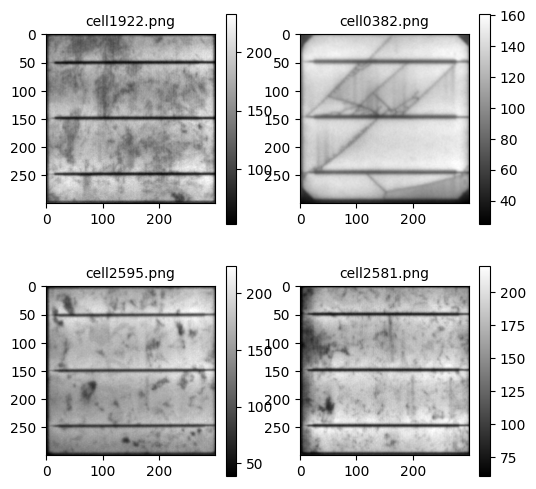

In [7]:
seq.head()

This can also be customized using several options. For example:

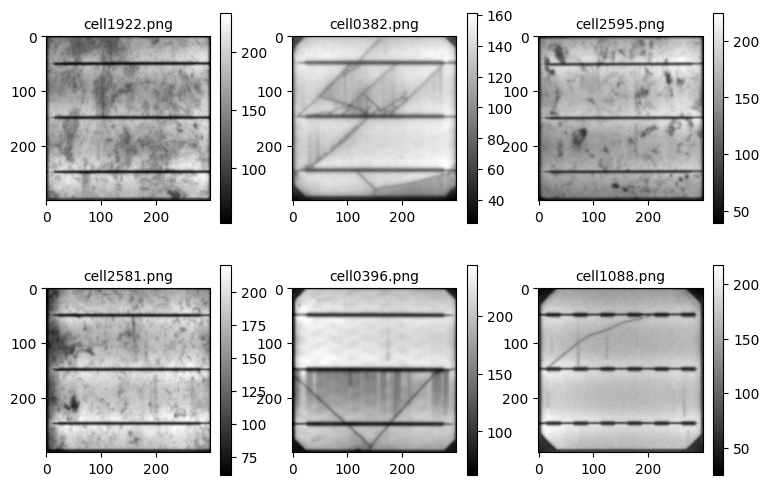

In [8]:
seq.head(N=6, cols=3)

Now, we may also verify that `crack_seq` only contains images with cracks, which turns out true:

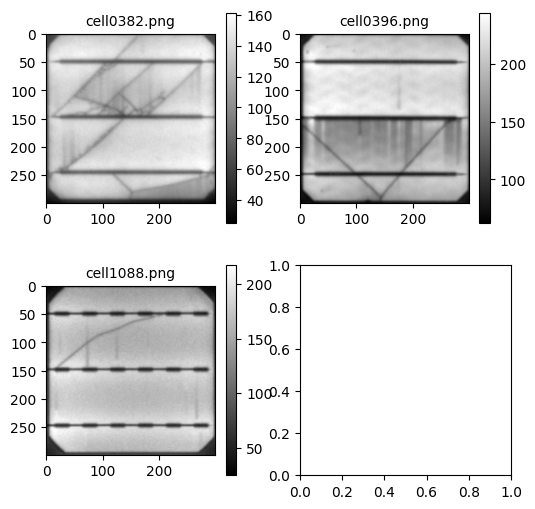

In [9]:
crack_seq.head()

## Image access and sequence manipulation

We can also directly access a single image by it's index and view it:

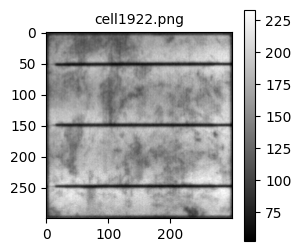

In [10]:
img = seq[0]
img.show()

Using the regular slicing syntax allows accessing groups of images as well:

In [11]:
seq[2:4]

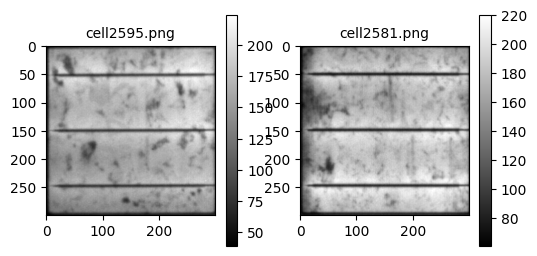

In [12]:
seq[2:4].head()

## References:

[1] Buerhop-Lutz, C.; Deitsch, S.; Maier, A.; Gallwitz, F.; Berger, S.; Doll, B.; Hauch, J.; Camus, C. & Brabec, C. J. A Benchmark for Visual Identification of Defective Solar Cells in Electroluminescence Imagery. European PV Solar Energy Conference and Exhibition (EU PVSEC), 2018.

[2] Deitsch, S., Buerhop-Lutz, C., Sovetkin, E., Steland, A., Maier, A., Gallwitz, F., & Riess, C. (2021). Segmentation of photovoltaic module cells in uncalibrated electroluminescence images. Machine Vision and Applications, 32(4).

[3] Deitsch, S.; Christlein, V.; Berger, S.; Buerhop-Lutz, C.; Maier, A.; Gallwitz, F. & Riess, C. Automatic classification of defective photovoltaic module cells in electroluminescence images. Solar Energy, Elsevier BV, 2019, 185, 455-468.